Pick out two wells in close proximity.

In [12]:
exec(open('calc_cdfs.py').read())

In [13]:
print(all_data.shape)
all_data.head()

(40, 28)


,Dbkey,Station,Site,Group Name,Data Type,Frequency,Statistic Type,Recorder,Agency,Start Date,...,X COORD,Y COORD,Basin,Structure Type,Section,Township,Range,sigmoid_a,sigmoid_b,sigmoid_r2
0,NV387,CH323,CH323,CH323,WELL,DA,MAX,????,USGS,16-May-01,...,405351.770,896624.050,TIDCAL.N,NaN,25,42,25,26.565825,1.168734,0.994688
1,L7462,CRS01FS,CRS01F,CRS01F,WELL,DA,MEAN,CR10,WMD,2-Nov-99,...,557891.616,892205.684,EAST CAL,NaN,26,42,30,10.231386,1.294867,0.980040
2,TA202,CRS01NS,CRS01N,CRS01N,WELL,DA,MEAN,MOD1,WMD,2-Nov-99,...,557831.589,892534.391,EAST CAL,NaN,26,42,30,9.866855,4.807597,0.997477
3,TA204,CRS02FS,CRS02F,CRS02F,WELL,DA,MEAN,MOD1,WMD,3-Nov-99,...,579823.685,892487.065,EAST CAL,NaN,28,42,31,11.123020,0.987549,0.984065
4,L7448,CRS02NS,CRS02N,CRS02N,WELL,DA,MEAN,CR10,WMD,4-Nov-99,...,579982.837,892796.857,EAST CAL,NaN,28,42,31,10.299006,3.313736,0.996217


In [14]:
crs5 = all_data[all_data['Site'] == 'CRS05N']
crs5.head()

,Dbkey,Station,Site,Group Name,Data Type,Frequency,Statistic Type,Recorder,Agency,Start Date,...,X COORD,Y COORD,Basin,Structure Type,Section,Township,Range,sigmoid_a,sigmoid_b,sigmoid_r2
9,L7457,CRS05NS,CRS05N,CRS05N,WELL,DA,MEAN,CR10,WMD,3-Nov-99,...,571719.77,841597.617,EAST CAL,NaN,17,44,31,24.078381,3.059555,0.994318


Load the data associated with these wells.

In [4]:
import pandas as pd
well1 = pd.read_csv('data/csvs/L7458.csv')
well2 = pd.read_csv('data/csvs/L7457.csv')

In [5]:
well1.head()

,Unnamed: 0,Station,DBKEY,Daily Date,gwater_elev_navd88,Qualifer,Revision Date
0,0,CRS05NM,L7458,03-NOV-1999,23.611,PT,01-MAR-2004
1,1,CRS05NM,L7458,04-NOV-1999,23.571,NaN,01-MAR-2004
2,2,CRS05NM,L7458,05-NOV-1999,23.321,NaN,01-MAR-2004
3,3,CRS05NM,L7458,06-NOV-1999,23.291,NaN,01-MAR-2004
4,4,CRS05NM,L7458,07-NOV-1999,23.441,NaN,01-MAR-2004


In [6]:
gwater1 = well1['gwater_elev_navd88'].dropna().to_numpy()
gwater2 = well2['gwater_elev_navd88'].dropna().to_numpy()

In [7]:
import numpy as np
def compute_cdf(arr):
    arr_sort = np.sort(arr)
    N = len(arr_sort)
    return arr_sort, np.array(range(N)) / N

x1, y1 = compute_cdf(gwater1)
x2, y2 = compute_cdf(gwater2)

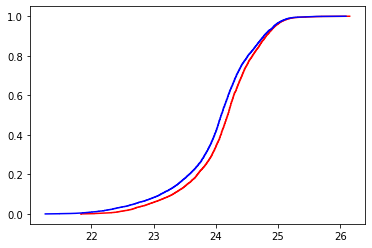

In [8]:
import matplotlib.pyplot as plt
plt.plot(x1, y1, 'red')
plt.plot(x2, y2, 'blue')

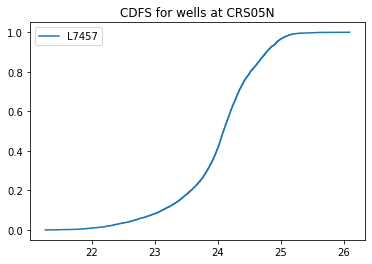

In [15]:
def show_cdfs_at_site(site):
    plt.figure()
    keys = all_data[all_data['Site'] == site]['Dbkey'].to_numpy()
    for key in keys:
        this_df = pd.read_csv('data/csvs/{}.csv'.format(key))
        plt.plot(*compute_cdf(this_df['gwater_elev_navd88'].dropna().to_numpy()), label=key)
    
    plt.legend()
    plt.title('CDFS for wells at ' + site)
    plt.show()

show_cdfs_at_site('CRS05N')

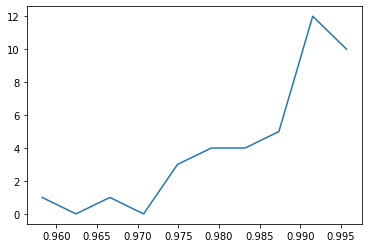

In [21]:
hist, edges = np.histogram(all_data['sigmoid_r2'].to_numpy())
edges = edges[:-1]

plt.plot(edges, hist)

In [18]:
edges

array([0.95827048, 0.96242597, 0.96658146, 0.97073694, 0.97489243,
       0.97904792, 0.9832034 , 0.98735889, 0.99151438, 0.99566986])